In [1]:
%matplotlib widget
import spectral as spy
import spectral.io.envi as envi

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import japanize_matplotlib

from PIL import Image
import csv
import mplcursors

from scipy.signal import argrelmax

In [2]:
HDR_PATH_iphone = '../data/light_base_2023-07-26_015/results/REFLECTANCE_2023-07-26_015.hdr'
HDR_PATH_pixel = '../data/light_smartphone_angle_2023-07-26_017/results/REFLECTANCE_2023-07-26_017.hdr'
HDR_PATH_huawei = '../data/light_angle_2023-07-26_018/results/REFLECTANCE_2023-07-26_018.hdr'

IMG_PATH_iphone = '../data/light_base_2023-07-26_015/results/REFLECTANCE_2023-07-26_015.png'
IMG_PATH_pixel = '../data/light_smartphone_angle_2023-07-26_017/results/REFLECTANCE_2023-07-26_017.png'
IMG_PATH_huawei = '../data/light_angle_2023-07-26_018/results/REFLECTANCE_2023-07-26_018.png'

In [3]:
spec_img_i = envi.open(HDR_PATH_iphone)
spec_img_p = envi.open(HDR_PATH_pixel)
spec_img_h = envi.open(HDR_PATH_huawei)

In [4]:
wave_lengthes = []
hdr = envi.read_envi_header(HDR_PATH_iphone)

for wl in hdr['wavelength']:
    wave_lengthes.append(float(wl))

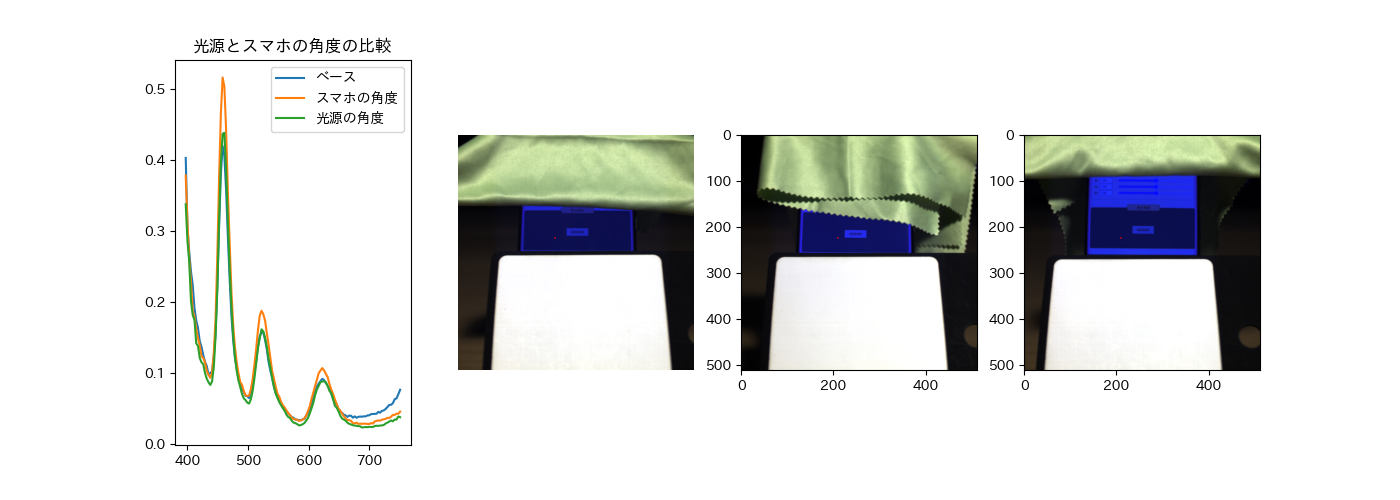

In [6]:
pixel_x = 210 # X座標
pixel_y = 225  # Y座標
color = (255, 0, 0)  # 色(RGB値)

range=[-1,0,1]
image_i = Image.open(IMG_PATH_iphone)
for i in range:
    for j in range:
        image_i.putpixel((pixel_x+i, pixel_y+j), color)
        
image_p = Image.open(IMG_PATH_pixel)
for i in range:
    for j in range:
        image_p.putpixel((pixel_x+i, pixel_y+j), color)
image_h = Image.open(IMG_PATH_huawei)
for i in range:
    for j in range:
        image_h.putpixel((pixel_x+i, pixel_y+j), color)

x = wave_lengthes[:121]
y_i = spec_img_i.read_pixel(512-pixel_x,pixel_y)[:121]
y_p = spec_img_p.read_pixel(512-pixel_x,pixel_y)[:121]
y_h = spec_img_h.read_pixel(512-pixel_x,pixel_y)[:121]

fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)


ax1.plot(x,y_i,label='ベース')
ax1.plot(x,y_p,label='スマホの角度')
ax1.plot(x,y_h,label='光源の角度')
ax1.set_title('光源とスマホの角度の比較')
ax1.legend()
ax2.imshow(image_i)
ax2.axis('off')
ax3.imshow(image_p)
ax4.imshow(image_h)
mplcursors.cursor(hover=True)

plt.show()

In [15]:
ex_max_i=argrelmax(y_i,order=3)
ex_max_p = argrelmax(y_p,order=3)
ex_max_h = argrelmax(y_h,order=3)
print(ex_max_i,ex_max_p,ex_max_h)

(array([19, 63, 80, 94]),) (array([21, 77, 88]),) (array([22, 58, 73, 79]),)


In [16]:
for elem in ex_max_i[0]:
    print(y_i[elem])

1.7109557
0.030363036
0.037723362
0.040727273


In [17]:
for i in ex_max_p[0]:
    print(y_p[i])

1.6316831
0.05837075
0.054237287


In [18]:
for i in ex_max_h[0]:
    print(y_h[i])

1.2564613
0.030116359
0.03715776
0.03686636
